In [1]:
# Importing Dependencies

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("Website Data.csv")

In [5]:
df.head()

,# ----------------------------------------,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,Session primary channel group (Default channel...,Date + hour (YYYYMMDDHH),Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count
1,Direct,2024041623,237,300,144,47.52666667,0.607594937,4.673333333,0.48,1402
2,Organic Social,2024041719,208,267,132,32.09737828,0.634615385,4.29588015,0.494382022,1147
3,Direct,2024041723,188,233,115,39.93991416,0.611702128,4.587982833,0.493562232,1069
4,Organic Social,2024041718,187,256,125,32.16015625,0.668449198,4.078125,0.48828125,1044


In [6]:
df.describe()

,# ----------------------------------------,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
count,3183,3183,3183,3183,3183,3183,3183,3183,3183,3183
unique,8,673,148,181,104,2824,809,2026,987,679
top,Direct,2024042417,1,1,0,0,0,1,0,1
freq,672,6,335,340,393,170,393,133,393,115


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3183 entries, 0 to 3182
Data columns (total 10 columns):
 #   Column                                      Non-Null Count  Dtype 
---  ------                                      --------------  ----- 
 0   # ----------------------------------------  3183 non-null   object
 1   Unnamed: 1                                  3183 non-null   object
 2   Unnamed: 2                                  3183 non-null   object
 3   Unnamed: 3                                  3183 non-null   object
 4   Unnamed: 4                                  3183 non-null   object
 5   Unnamed: 5                                  3183 non-null   object
 6   Unnamed: 6                                  3183 non-null   object
 7   Unnamed: 7                                  3183 non-null   object
 8   Unnamed: 8                                  3183 non-null   object
 9   Unnamed: 9                                  3183 non-null   object
dtypes: object(10)
memory usa

In [8]:
#  Data Cleaning

# Change row 1 to column name

In [18]:
df.columns=df.iloc[0]
df=df.drop(index=0).reset_index(drop=True)   # to drop the 0th index row and re arrange the index order
df.columns=['Channel Group', 'DateHour','Users',"Sessions",'Engaged Sessions','Average engagement time per session','Engaged sessions per user','Events per session','Engagement rate','Event Count']

In [20]:
df.head()

,Channel Group,DateHour,Users,Sessions,Engaged Sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event Count
0,Direct,2024041723,188,233,115,39.93991416,0.611702128,4.587982833,0.493562232,1069
1,Organic Social,2024041718,187,256,125,32.16015625,0.668449198,4.078125,0.48828125,1044
2,Organic Social,2024041720,175,221,112,46.91855204,0.64,4.529411765,0.50678733,1001
3,Organic Social,2024041721,160,206,103,59.31553398,0.64375,4.694174757,0.5,967
4,Organic Social,2024050119,160,219,110,40.31506849,0.6875,4.630136986,0.502283105,1014


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3180 entries, 0 to 3179
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   Channel Group                        3180 non-null   object
 1   DateHour                             3180 non-null   object
 2   Users                                3180 non-null   object
 3   Sessions                             3180 non-null   object
 4   Engaged Sessions                     3180 non-null   object
 5   Average engagement time per session  3180 non-null   object
 6   Engaged sessions per user            3180 non-null   object
 7   Events per session                   3180 non-null   object
 8   Engagement rate                      3180 non-null   object
 9   Event Count                          3180 non-null   object
dtypes: object(10)
memory usage: 248.6+ KB


In [25]:
# To change the data tye of the numeric data columns

# changing the date Hour into Date and Hour

df['DateHour']=pd.to_datetime(df['DateHour'],format='%Y%m%d%H',errors="coerce")
numeric_cols=df.columns.drop(['Channel Group',"DateHour"]) # to get only numeric columns
df[numeric_cols]=df[numeric_cols].apply(pd.to_numeric,errors='coerce')    #convert objects into numbers
df['Hour']=df['DateHour'].dt.hour   #create hour column from datehour

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3180 entries, 0 to 3179
Data columns (total 11 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   Channel Group                        3180 non-null   object        
 1   DateHour                             3180 non-null   datetime64[ns]
 2   Users                                3180 non-null   int64         
 3   Sessions                             3180 non-null   int64         
 4   Engaged Sessions                     3180 non-null   int64         
 5   Average engagement time per session  3180 non-null   float64       
 6   Engaged sessions per user            3180 non-null   float64       
 7   Events per session                   3180 non-null   float64       
 8   Engagement rate                      3180 non-null   float64       
 9   Event Count                          3180 non-null   int64         
 10  Hour        

In [26]:
df.head()

,Channel Group,DateHour,Users,Sessions,Engaged Sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event Count,Hour
0,Direct,2024-04-17 23:00:00,188,233,115,39.939914,0.611702,4.587983,0.493562,1069,23
1,Organic Social,2024-04-17 18:00:00,187,256,125,32.160156,0.668449,4.078125,0.488281,1044,18
2,Organic Social,2024-04-17 20:00:00,175,221,112,46.918552,0.640000,4.529412,0.506787,1001,20
3,Organic Social,2024-04-17 21:00:00,160,206,103,59.315534,0.643750,4.694175,0.500000,967,21
4,Organic Social,2024-05-01 19:00:00,160,219,110,40.315068,0.687500,4.630137,0.502283,1014,19


In [27]:
df.describe()

,DateHour,Users,Sessions,Engaged Sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event Count,Hour
count,3180,3180.000000,3180.000000,3180.000000,3180.000000,3180.000000,3180.000000,3180.000000,3180.000000,3180.000000
mean,2024-04-20 01:19:32.830188800,41.822327,51.046541,28.256604,66.661457,0.606440,4.676089,0.503406,241.623270,11.801258
min,2024-04-06 00:00:00,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,2024-04-13 02:00:00,20.000000,24.000000,13.000000,32.105625,0.561404,3.750000,0.442857,103.000000,6.000000
50%,2024-04-20 02:30:00,42.000000,51.000000,27.000000,49.068279,0.666667,4.410256,0.545455,226.000000,12.000000
75%,2024-04-26 22:00:00,60.000000,71.000000,41.000000,71.509259,0.750000,5.218581,0.633333,339.000000,18.000000
max,2024-05-03 23:00:00,188.000000,256.000000,125.000000,4525.000000,2.000000,56.000000,1.000000,1117.000000,23.000000
std,NaN,29.240446,36.466375,20.472406,127.238737,0.264105,2.796099,0.228277,182.643504,6.884807


# Trends observed in the website sessions overtime


  

sessions and Users Overtime

In [28]:
sns.set(style="whitegrid")

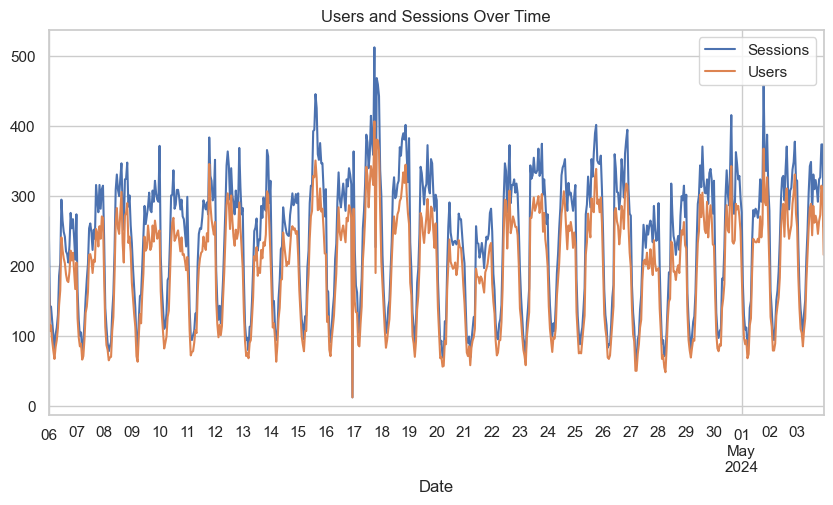

In [32]:
plt.figure(figsize=(10,5))
df.groupby('DateHour')[["Sessions","Users"]].sum().plot(ax=plt.gca())
plt.title("Users and Sessions Over Time")
plt.xlabel("Date")
plt.show()

# Marketing Channel brought highest no. of users on website

Total Users by channel

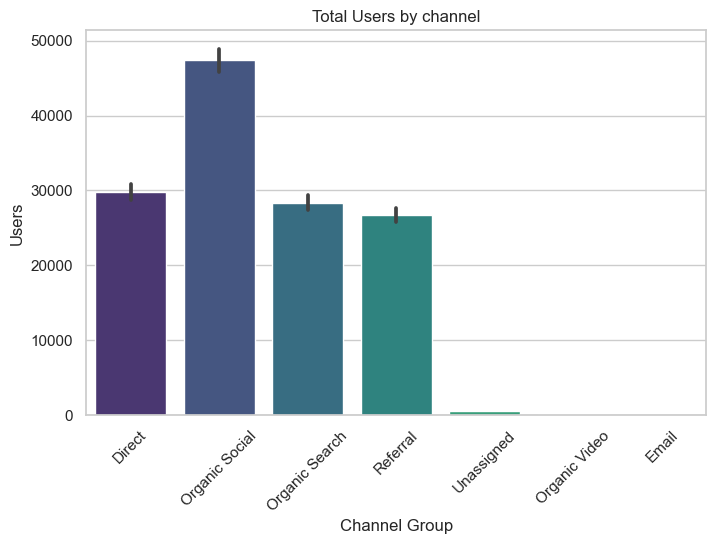

In [37]:
plt.figure(figsize=(8,5))
sns.barplot(data=df,x="Channel Group",y="Users",estimator=np.sum,palette="viridis")
plt.title("Total Users by channel")
plt.xticks(rotation=45)
plt.show()

# Channel having highest Engagement Time

Average Engagement time by channel

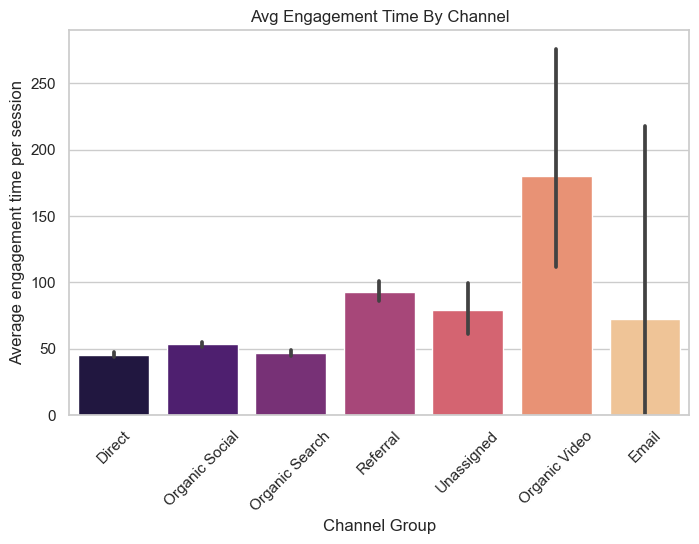

In [43]:
plt.figure(figsize=(8,5))
sns.barplot(data=df,x="Channel Group",y="Average engagement time per session",estimator=np.mean,palette="magma")
plt.title("Avg Engagement Time By Channel")
plt.xticks(rotation=45)
plt.show()

# How Engagement Rate Vary across Different Channel

Engagement Rate Distribution by channel

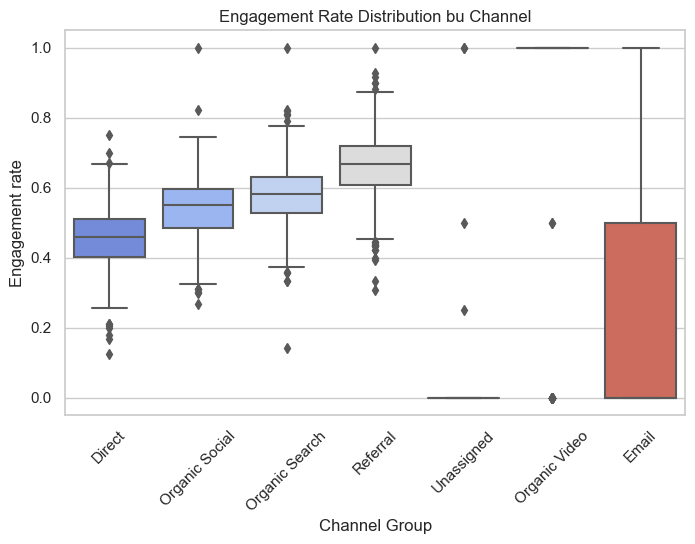

In [48]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df,x="Channel Group",y="Engagement rate",palette="coolwarm")
plt.title("Engagement Rate Distribution bu Channel")
plt.xticks(rotation=45)
plt.show()

# Which channel driving more engaged sessions compared to non engaged 

Engaged VS Non Engaged Sessions

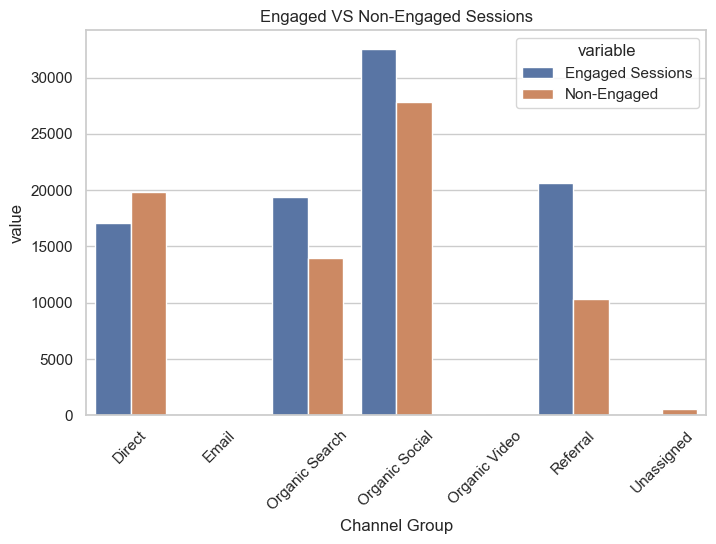

In [50]:
session_df=df.groupby("Channel Group")[["Sessions","Engaged Sessions"]].sum().reset_index()
session_df["Non-Engaged"]=session_df['Sessions']-session_df["Engaged Sessions"]
session_df_melted=session_df.melt(id_vars="Channel Group",value_vars=["Engaged Sessions","Non-Engaged"])

plt.figure(figsize=(8,5))
sns.barplot(data=session_df_melted,x="Channel Group", y="value",hue="variable")
plt.title("Engaged VS Non-Engaged Sessions")
plt.xticks(rotation=45)
plt.show()

# Peak Hour Time - Channel hour with max traffic

Traffic By Hour and Channel

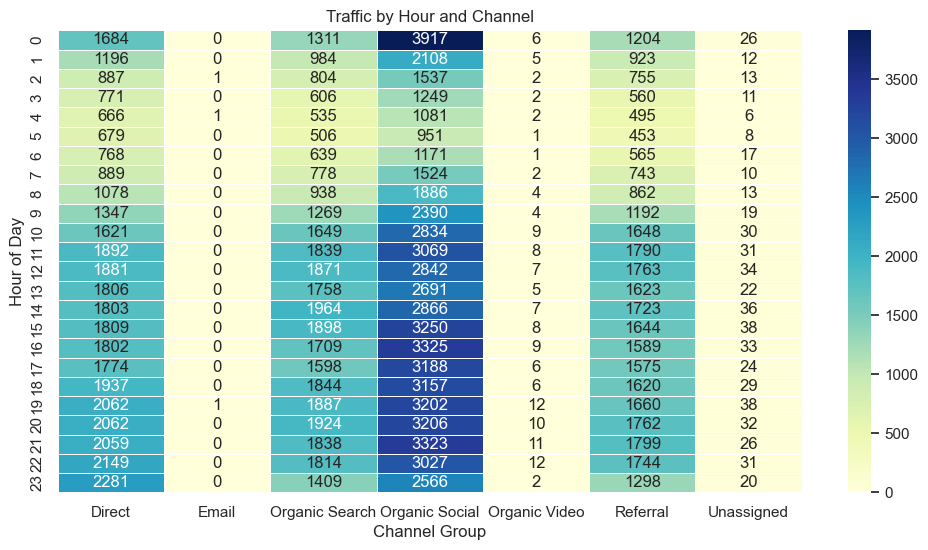

In [55]:
heatmap_data=df.groupby(["Hour","Channel Group"])["Sessions"].sum().unstack().fillna(0)

plt.figure(figsize=(12,6))
sns.heatmap(heatmap_data,cmap="YlGnBu",linewidths=.5,annot=True,fmt='.0f')
plt.title("Traffic by Hour and Channel")
plt.xlabel("Channel Group")
plt.ylabel("Hour of Day")
plt.show()

# Correlation between High Traffic and High Engagement

Engagement Rate VS Sessions overtime

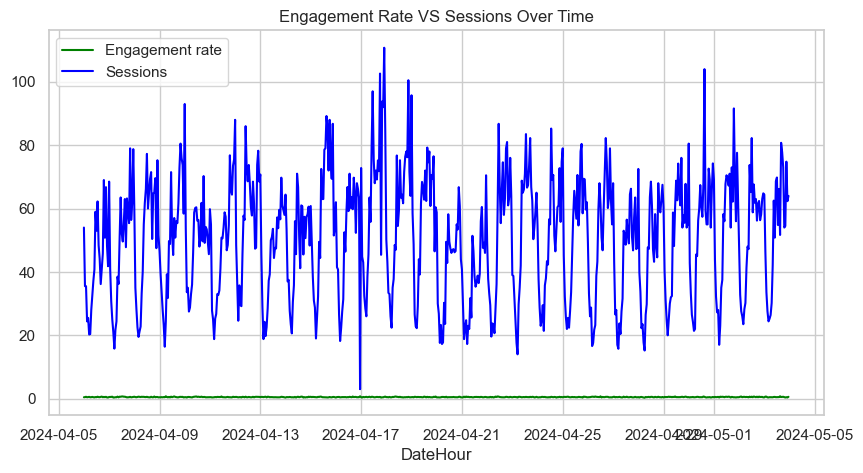

In [63]:
df_plot=df.groupby("DateHour")[["Engagement rate","Sessions"]].mean().reset_index()
plt.figure(figsize=(10,5))
plt.plot(df_plot["DateHour"],df_plot["Engagement rate"],label="Engagement rate",color="green")
plt.plot(df_plot["DateHour"],df_plot["Sessions"],label="Sessions",color="blue")
plt.title("Engagement Rate VS Sessions Over Time")
plt.xlabel("DateHour")
plt.legend()
plt.grid(True)
plt.show()